In [12]:
!pip install plotly


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy import stats

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.8 MB 5.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/14.8 MB 5.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.4/14.8 MB 5.3 MB/s eta 0:00:03
   ----------- ---------------------------- 4.2/14.8 MB 4.7 MB/s eta 0:00:03
   ------------ --------------------------- 4.7/14.8 MB 4.2 MB/s eta 0:00:03
   -------------- ------------------------- 5.2/14.8 MB 4.0 MB/s eta 0:00:03
   -------------- ------------------------- 5.2/14.8 MB 4.0 MB/s eta 0:00:03
   ----------------- ---------------------- 6.6/14.8 MB 3.7 MB/s eta 0:00:03
   ------------------ --------------------- 6.8/14.8 MB 3.6 MB/s eta 0:00:03
   -------------------- ------------------- 7.6/14.8 MB 3.6 MB/s eta 0:00:03
   ---------------------- ----------------- 8.4/14.8 MB 3.5 MB/s eta 0:00:02
   ------------------------ --------------- 8.9/14.8 MB 3.4 MB/s eta 0:00:02
   ---


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:

df = pd.read_csv("Marketing_Campaign_Dataset.csv")
print("Initial Dataset:")
print(df.head())

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [16]:

missing_values = df.isnull().sum()
missing_values



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [17]:
summary_stats = df.describe()
summary_stats


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,...,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.000000,100279.0,100279.0,100279.000000
mean,50140.000000,1944.139720,333467.834329,1.001845,0.999741,49.002802,746.463477,99.083387,862.007549,129.312987,...,9.499078,0.502139,0.500514,0.500873,0.497951,0.501890,0.499576,3.0,11.0,0.498988
std,28948.198159,29.713721,191857.770691,0.817953,0.816680,28.531490,431.644442,57.403252,498.945468,74.862017,...,5.771568,0.499998,0.500002,0.500002,0.499998,0.499999,0.500002,0.0,0.0,0.500001
min,1.000000,1893.000000,1735.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,25070.500000,1918.000000,167676.135000,0.000000,0.000000,24.000000,372.000000,50.000000,431.000000,65.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,50140.000000,1944.000000,332609.990000,1.000000,1.000000,49.000000,746.000000,99.000000,862.000000,130.000000,...,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.0,11.0,0.000000
75%,75209.500000,1970.000000,498824.360000,2.000000,2.000000,74.000000,1119.000000,149.000000,1297.000000,194.000000,...,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
max,100279.000000,1995.000000,666664.130000,2.000000,2.000000,98.000000,1492.000000,198.000000,1724.000000,258.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [18]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns



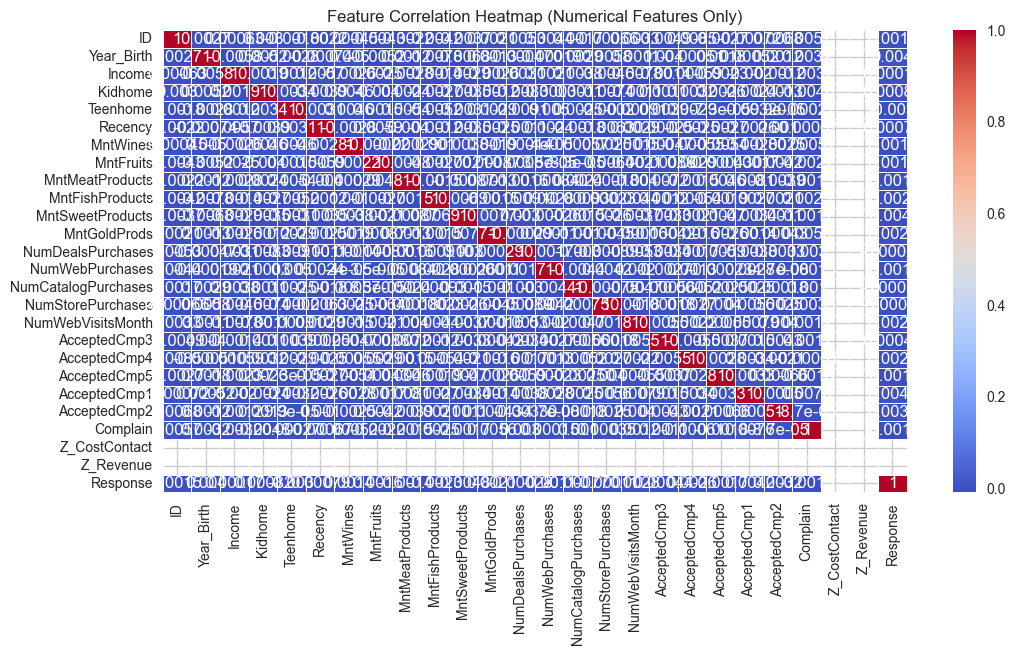

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numerical Features Only)")
plt.show()

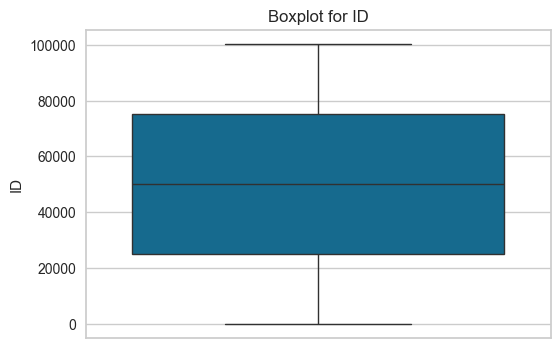

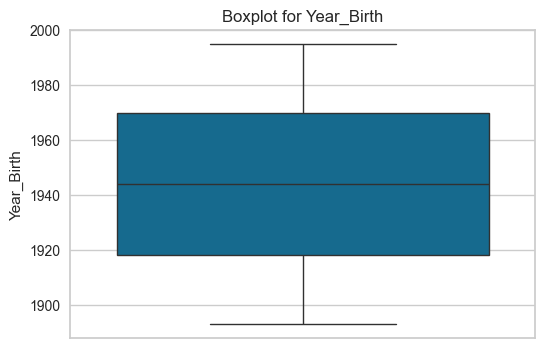

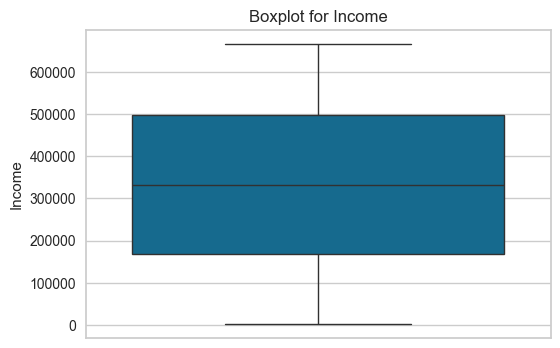

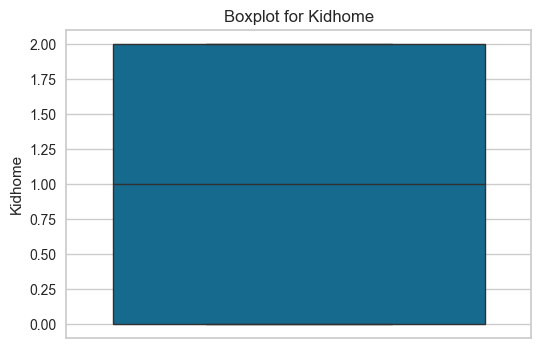

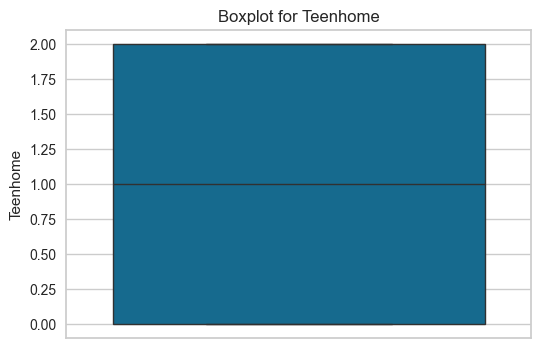

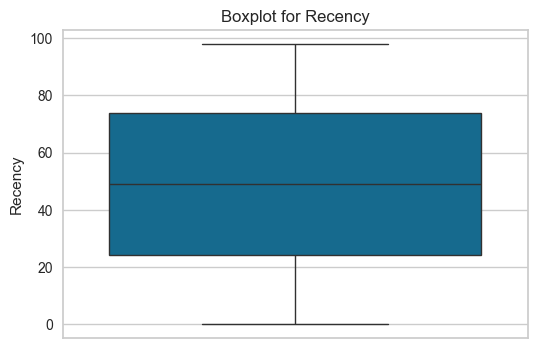

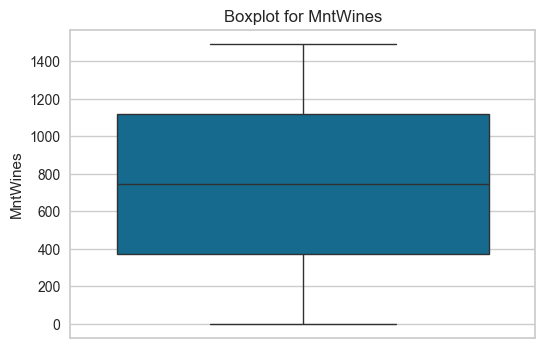

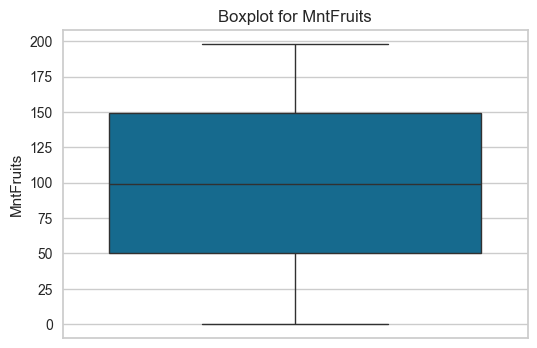

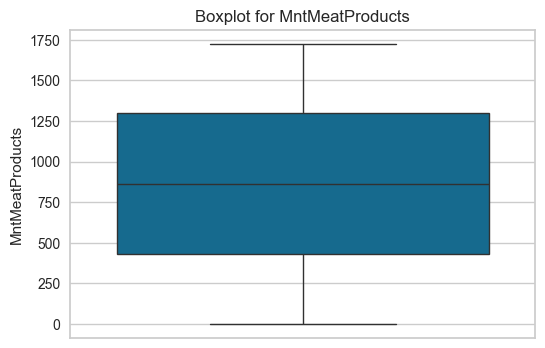

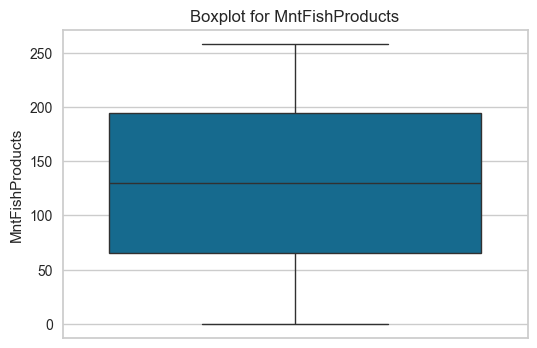

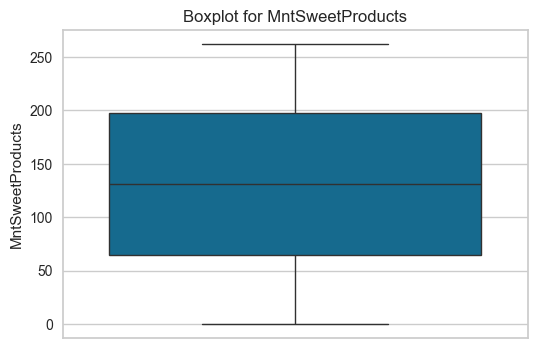

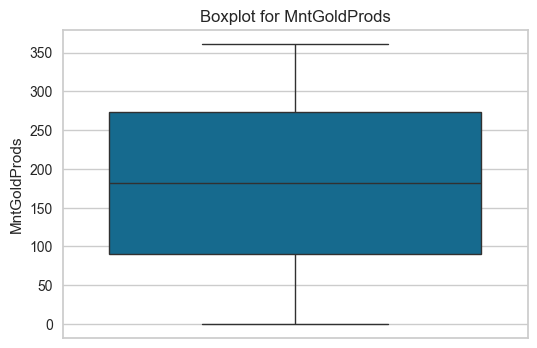

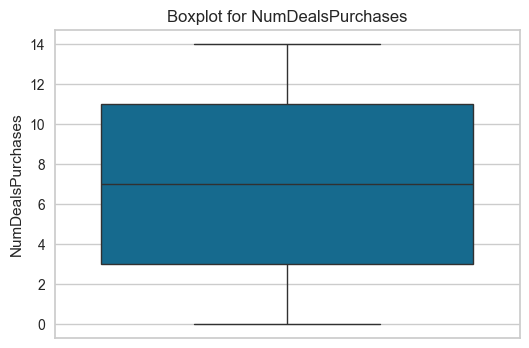

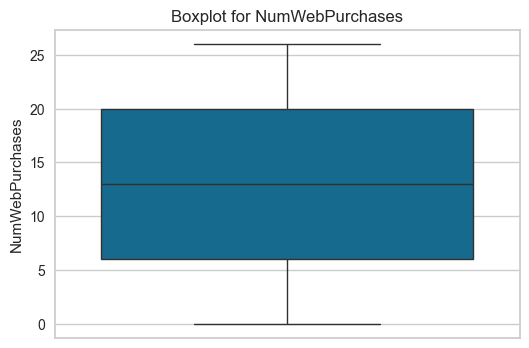

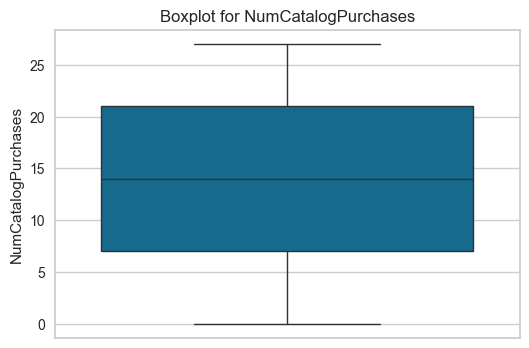

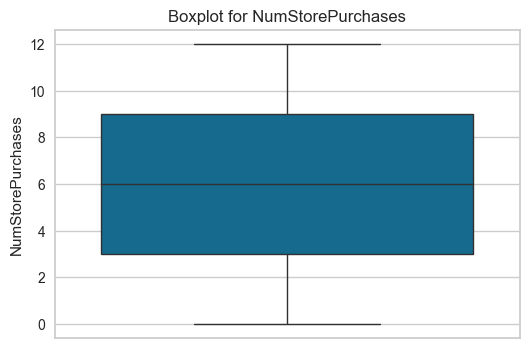

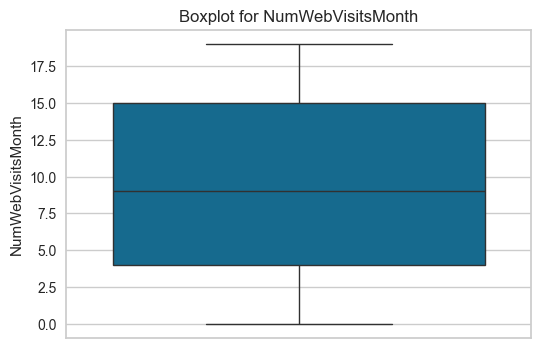

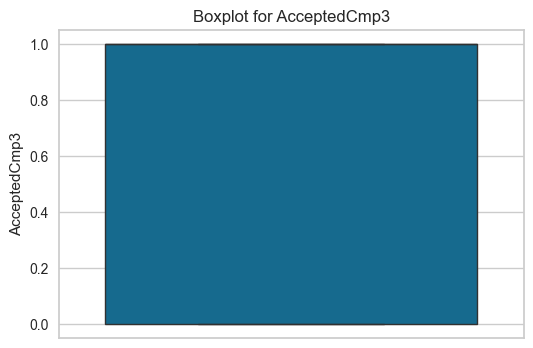

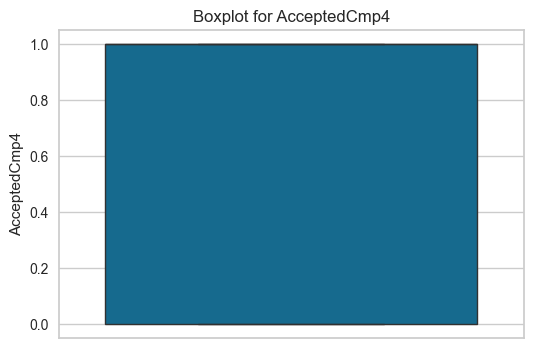

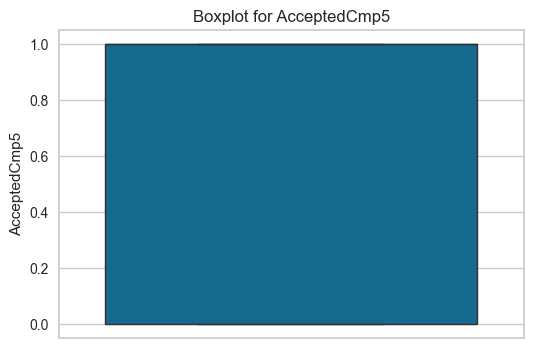

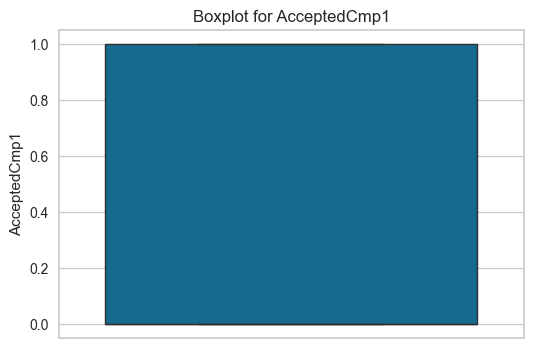

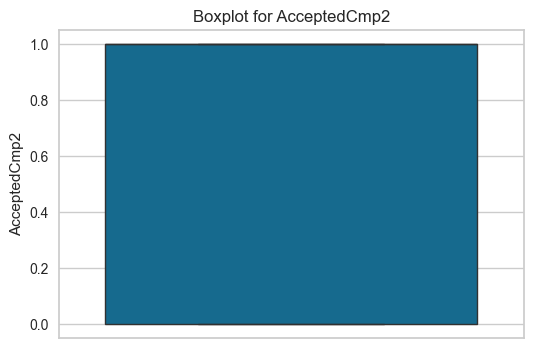

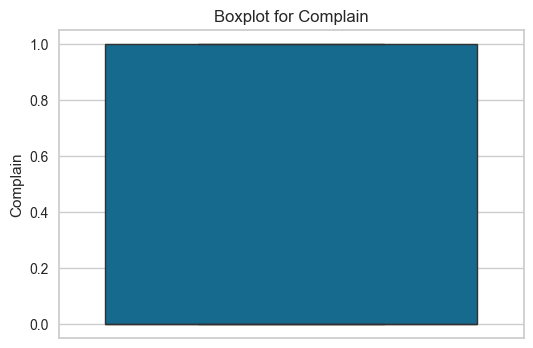

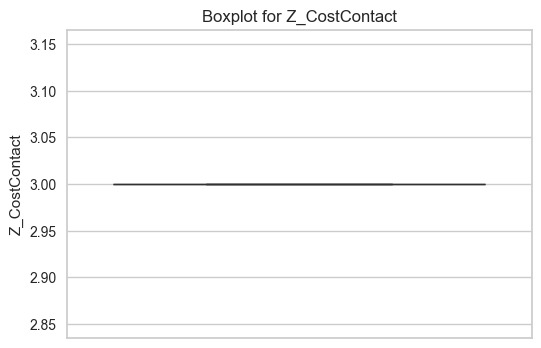

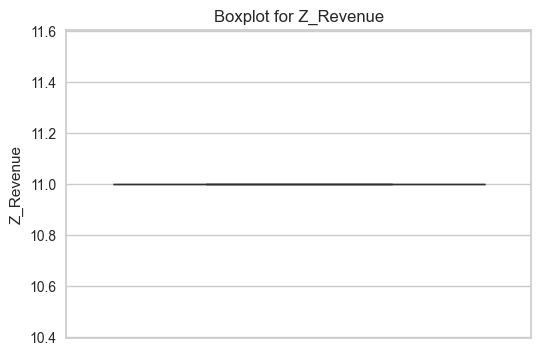

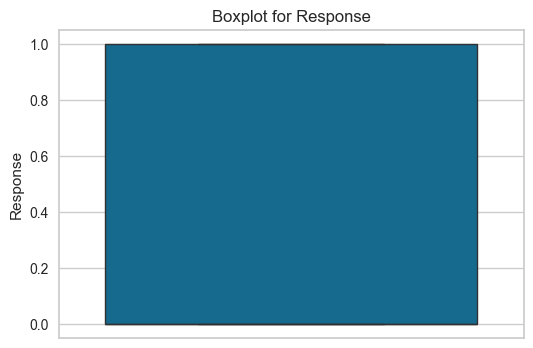

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [21]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))


In [22]:

print("\nNumber of Outliers per Column:")
print(outlier_mask.sum())


Number of Outliers per Column:
ID                     0
Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


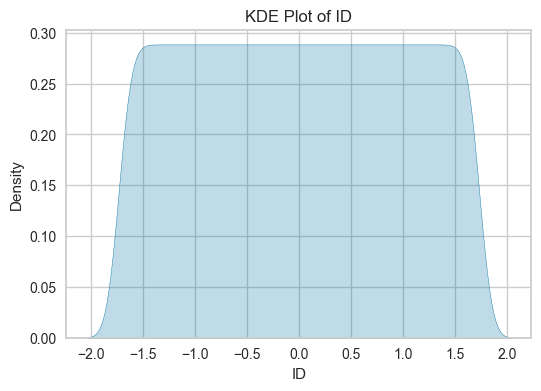

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


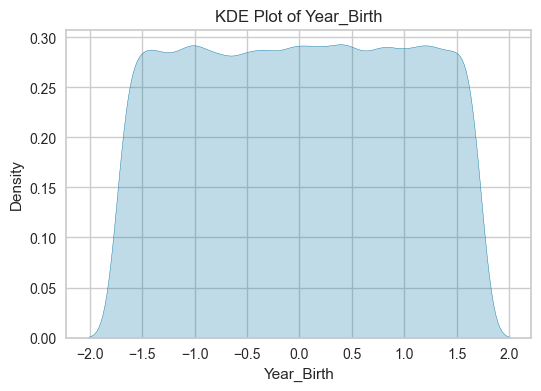

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


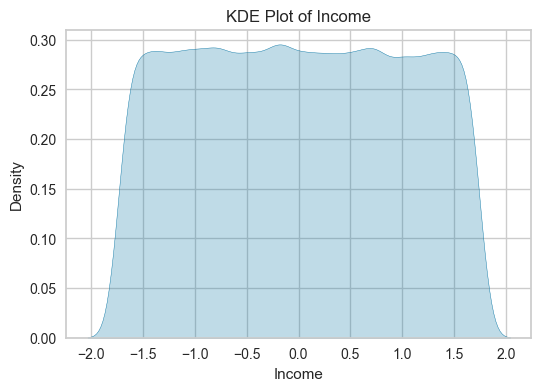

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


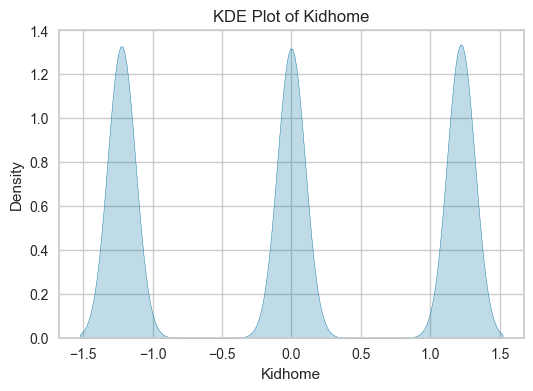

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


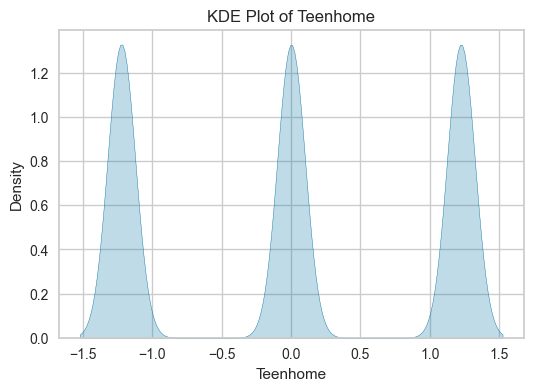

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


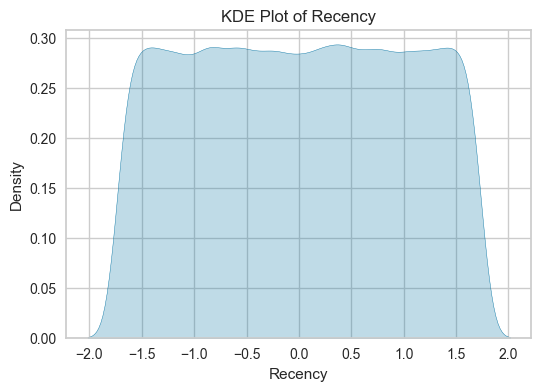

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


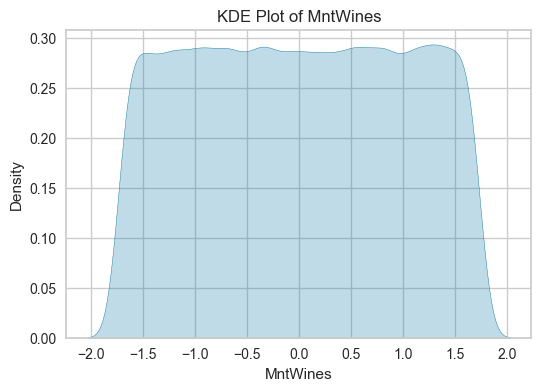

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


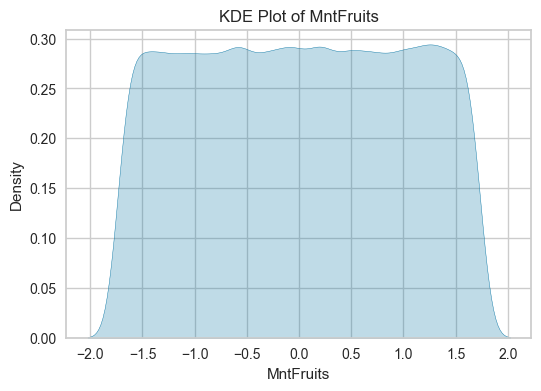

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


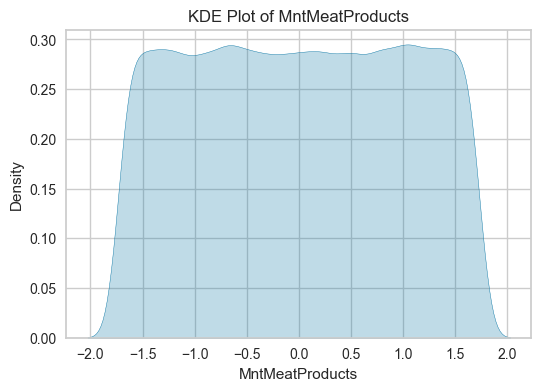

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


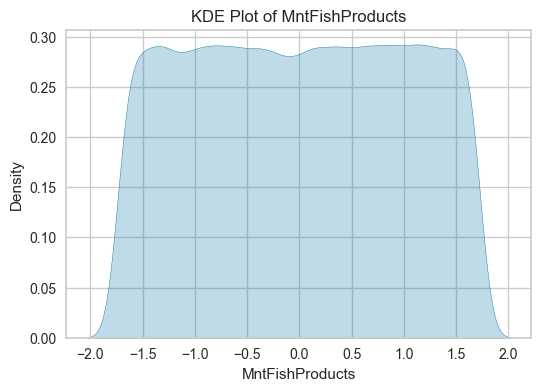

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


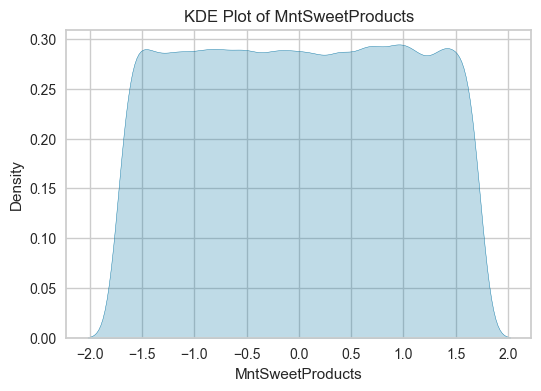

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


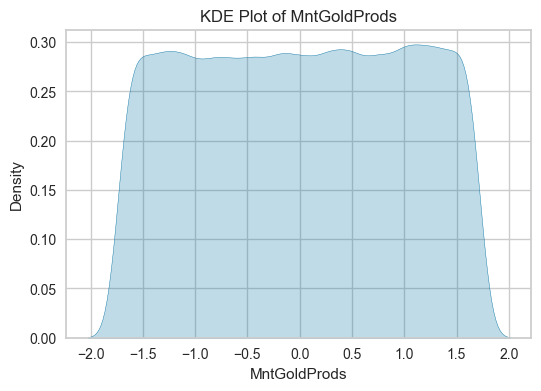

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


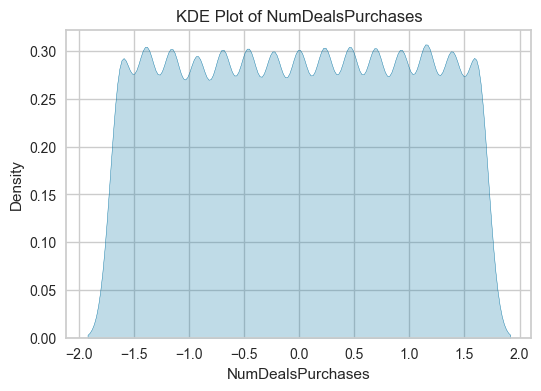

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


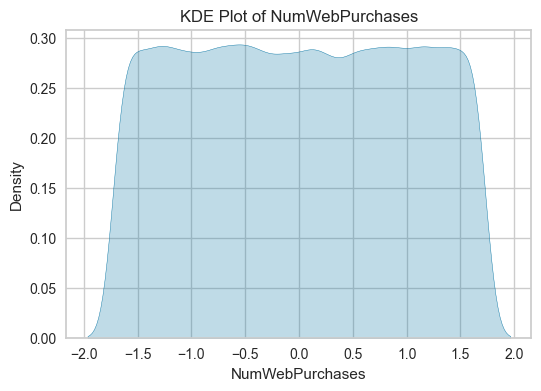

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


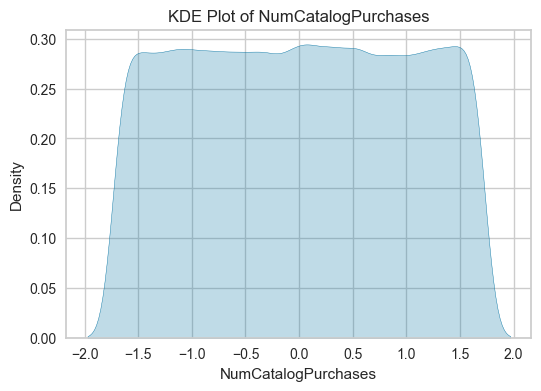

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


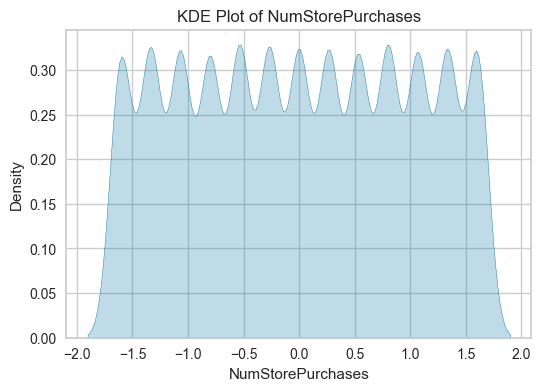

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


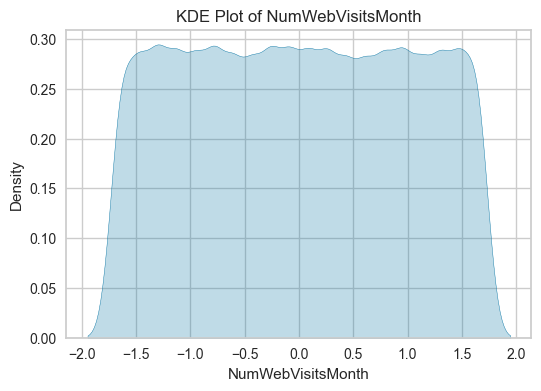

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


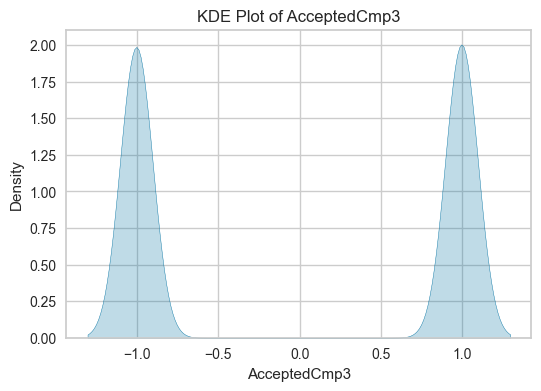

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


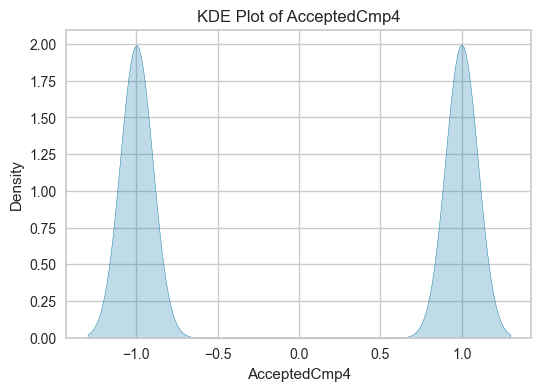

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


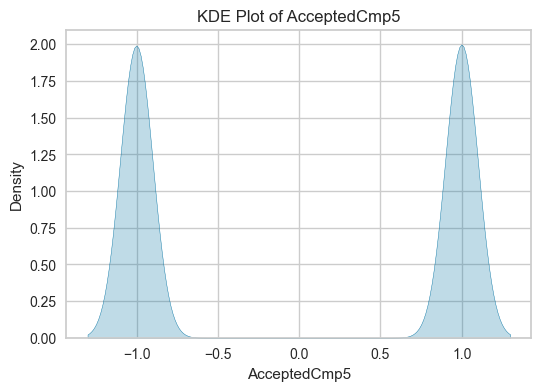

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


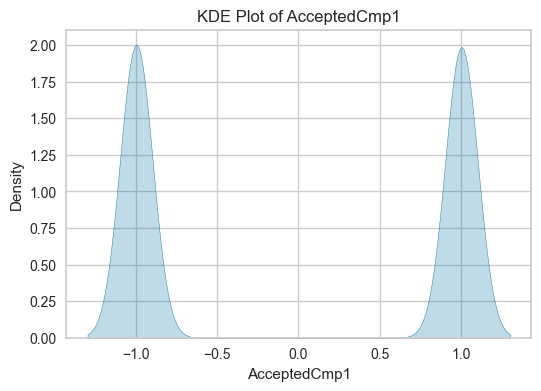

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


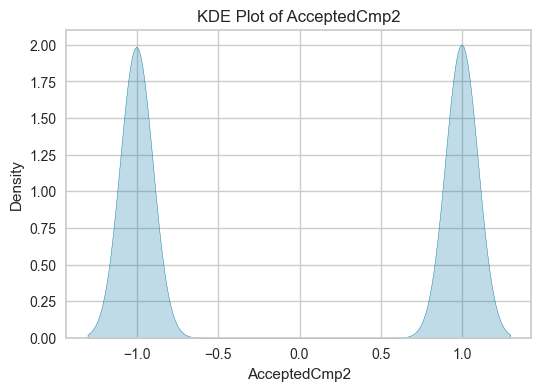

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


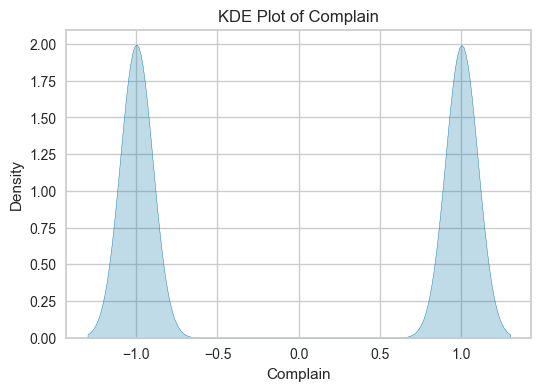

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], shade=True)


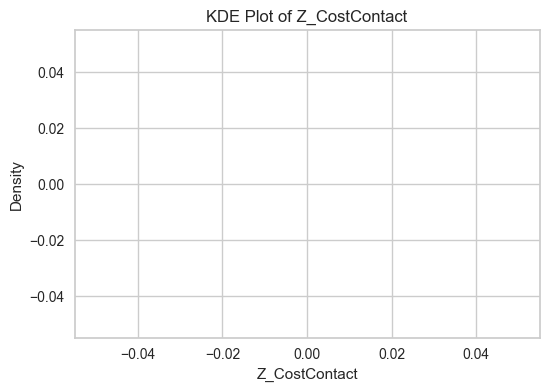

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], shade=True)


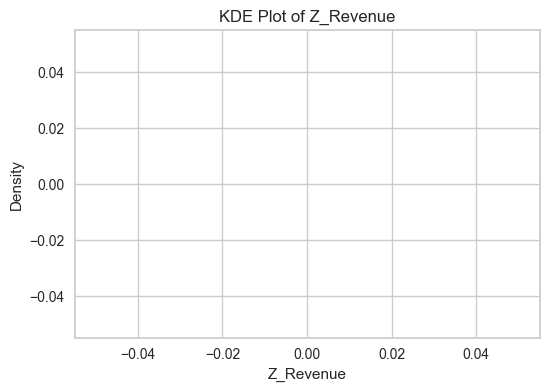

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_8932\3728075651.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


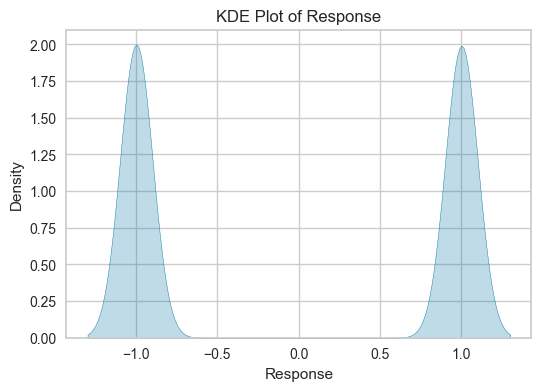

In [27]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f"KDE Plot of {col}")
    plt.show()

In [28]:
# Dropping less relevant features based on correlation analysis
drop_features = ['ID', 'Z_CostContact', 'Z_Revenue']  # Example features to drop
df = df.drop(columns=drop_features)

In [29]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [30]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

KeyError: "['ID', 'Z_CostContact', 'Z_Revenue'] not in index"

In [25]:
# Convert data to NumPy array for K-Prototypes
X = df.values

# Finding Optimal Number of Clusters using Elbow Method
distortions = []
k_values = range(2, 10)
for k in k_values:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    kproto.fit_predict(X, categorical=[df.columns.get_loc(col) for col in categorical_cols])
    distortions.append(sum(np.min(cdist(X[:, :len(numerical_cols)], kproto.cluster_centroids_[0], 'euclidean'), axis=1)) / X.shape[0])


In [6]:
from datetime import datetime


current_year = datetime.now().year
df["Age"] = current_year - df["Year_Birth"]

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Customer_Tenure"] = (datetime.now() - df["Dt_Customer"]).dt.days

df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Z_CostContact", "Z_Revenue"], inplace=True)



In [7]:
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["Income"] = df["Income"].clip(lower=lower_bound, upper=upper_bound)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Education            100279 non-null  object 
 1   Marital_Status       100279 non-null  object 
 2   Income               100279 non-null  float64
 3   Kidhome              100279 non-null  int64  
 4   Teenhome             100279 non-null  int64  
 5   Recency              100279 non-null  int64  
 6   MntWines             100279 non-null  int64  
 7   MntFruits            100279 non-null  int64  
 8   MntMeatProducts      100279 non-null  int64  
 9   MntFishProducts      100279 non-null  int64  
 10  MntSweetProducts     100279 non-null  int64  
 11  MntGoldProds         100279 non-null  int64  
 12  NumDealsPurchases    100279 non-null  int64  
 13  NumWebPurchases      100279 non-null  int64  
 14  NumCatalogPurchases  100279 non-null  int64  
 15  NumStorePurchases

In [8]:
 df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Tenure
0,Master,Single,491796.22,1,0,31,1364,72,1129,45,...,14,1,1,0,0,0,0,1,47,4103
1,Master,Married,513926.78,1,0,23,1275,94,455,217,...,5,1,1,0,0,0,0,1,51,3974
2,Graduation,Alone,521309.22,2,2,93,62,127,530,252,...,1,1,0,0,0,1,0,1,53,4417
3,PhD,YOLO,231628.91,1,0,13,251,87,1153,157,...,14,0,1,1,0,1,0,0,114,4300
4,2n Cycle,Divorced,223936.10,1,1,65,670,10,650,34,...,13,1,0,0,1,1,0,0,94,4313


In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

encoder = LabelEncoder()
df["Education"] = encoder.fit_transform(df["Education"])
df["Marital_Status"] = encoder.fit_transform(df["Marital_Status"])




In [10]:
numerical_cols = df.columns.difference(["Education", "Marital_Status"])
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Tenure
0,3,4,0.737013,0.5,0.0,0.316327,0.914209,0.363636,0.654872,0.174419,...,0.736842,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.166667,0.324553
1,3,3,0.770295,0.5,0.0,0.234694,0.854558,0.474747,0.263921,0.841085,...,0.263158,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.205882,0.203198
2,2,1,0.781398,1.0,1.0,0.948980,0.041555,0.641414,0.307425,0.976744,...,0.052632,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.225490,0.619944
3,4,7,0.345742,0.5,0.0,0.132653,0.168231,0.439394,0.668794,0.608527,...,0.736842,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.823529,0.509878
4,0,2,0.334173,0.5,0.5,0.663265,0.449062,0.050505,0.377030,0.131783,...,0.684211,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.627451,0.522107


In [ ]:
!pip install kmodes

from kmodes.kprototypes import KPrototypes
import numpy as np
import matplotlib.pyplot as plt


data_matrix = df.values

categorical_indices = [df.columns.get_loc(col) for col in ["Education", "Marital_Status"]]

costs = []
K_range = range(2, 10)

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42)
    cost = kproto.fit_predict(data_matrix, categorical=categorical_indices)
    costs.append(kproto.cost_)





[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, costs, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost")
plt.title("Elbow Method for Optimal k in K-Prototypes")
plt.show()